In [2]:
from skimage import io, img_as_float, img_as_ubyte, color, measure
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from functions import apply_vegetative_index, apply_otsu
import skimage.filters as skfil
from skimage.color import label2rgb
import cv2
from scipy import ndimage

BASIC IMAGE MANIPULATION

In [ ]:
# Open an image in python
image = io.imread('quadrat_photos_raw/20240530_164149.jpg')
print(image)

In [ ]:
# Make a lightened version of that image by multiplying its RGB values
darkened_image = image * .5
plt.imshow(darkened_image)

In [ ]:
# Make an overlay on top of the image.
# Make a red image.
image[10:500, 10:500, :] = [255, 0, 0] # parameters of [] are x, y, z pixel ranges
plt.imshow(image)

In [ ]:
# Make a random image that's 500 by 500 pixels. All pixels will be randomized. 
random_pic = np.random.random([500, 500])

# Display that image using matplotlib
plt.imshow(random_pic)

how to pillow library 

In [ ]:
img = Image.open('quadrat_photos_raw/20240531_103859.jpg')

# Print image type
print(type(img)) # Note that it's not a numpy array. It needs to be converted if you want to do numpy stuff.

# img.show() # Open the image in a separate window.
print(img.format) # print the format of the image (JPEG)

img1 = np.asarray(img) # Convert a pillow image to a numpy array
print(type(img1)) # Show datatype of new image, which is a numpy array

Matplotlib & Pyplot image opening

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
# Import an image as a numpy array
img = mpimg.imread('quadrat_photos_raw/20240531_103859.jpg')
print(type(img))
plt.imshow(img) # remember to use imshow for numpy arrays

Scikit image library

In [ ]:
from skimage import io # For reading in images
from skimage import io, img_as_float, img_as_ubyte

# Import image as a numpy array
img = io.imread('quadrat_photos_raw/20240531_103859.jpg') # Import image as a numpy array
print(type(img))
plt.imshow(img)

# Import image as a float. It converts pixel values into a number from 0-1.
img_float = img_as_float(img)
# img_float = io.imread('quadrat_photos/20240531_103859.jpg').astype(np.float) # alternate method
print(img_float)

Open CV

In [ ]:

import cv2 # import command for open cv


In [ ]:
img = cv2.imread('quadrat_photos_raw/20240531_103859.jpg', 1) # read in image (1 means in color, 0 means in monochrome)
plt.imshow(img) # show image. Notice how the colors are off. cv2's default is not RGB. It's BGR.

# Try using open cv methods of showing images.
gray_img = cv2.imread('quadrat_photos_raw/20240531_103859.jpg', 0)
color_img = cv2.imread('quadrat_photos_raw/20240531_103859.jpg', 1)

# Import it but convert the images from BGR to RGB
plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))

cv2.imshow('Gray Image', gray_img)
cv2.imshow('Color Image', color_img)

cv2.waitKey(0) # Keep the output window until you kill it (unless you put in 0 - that makes you able to close it manually)
cv2.destroyAllWindows() # Destroys all the windows that show up 

Reading all images

In [ ]:
import cv2
import glob

The * in the path designates which files the for loop will search through. Rad! Be warned, it will show every image in succession.

In [ ]:
path = 'quadrat_photos_raw/*.jpg'

# Loop through every file in the quadrat_photos folder and do operations on every one.
for file in glob.glob(path):
    print(file)
    a = cv2.imread(file)
    print(a)

    # Convert to RGB
    c = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

    # Show image
    cv2.imshow('Color Image', c)

    # Clean up windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()


IMAGE PROCESSING WITH PILLOW

In [ ]:
from PIL import Image

Resizing

In [ ]:
# Open the image. It is not a numpy array.
img = Image.open('quadrat_photos_raw/436552676_1025526125801177_8782775392322481521_n.jpg')

print(img.size) # Print the size - (width, height)

# Resize the image. It does an unexciting squish. Doesn't keep the aspect ratio. Bad thing
# small_img = img.resize((200, 300)) # make a copy that's smaller
# small_img.save('quadrat_photos_edited/test_small_image.jpg') # Save the image

small_img = img

# Resize but keep the aspect ratio. Better method.
small_img.thumbnail((510, 287))
small_img.save('quadrat_photos_edited/test_small_image_aspect_ratio.jpg') # Save the image

# You can't resize an image to be bigger than it is.


Cropping

In [ ]:
cropped_img = img.crop((0, 0, 300, 300)) # crop image to a square
cropped_img.save('quadrat_photos_edited/test_cropped_image.jpg')

# Put a cropped version of one image on top of another (no workie. But doesn't rlly matter)
img1 = Image.open('quadrat_photos_raw/441870424_993834382360394_2048396322547840220_n.jpg')
img2 = Image.open('quadrat_photos_raw/441575503_1505677643398773_3256282308229328881_n.jpg')

# Crop one image to make it smaller
img2 = img2.crop((10, 10, 20, 20))

# Copy image into another variable
img1_copy = img1.copy()
# Paste image 2 onto img1 @ the location 50, 50
img1_copy.paste(img2, (50, 50)) 
img1_copy.save('quadrat_photos_edited/test_bad_photoshop.jpg')

Rotation

In [ ]:
img90_deg_rotated = img.rotate(90, expand = True) 
img90_deg_rotated.save('quadrat_photos_edited/rotated_90.jpg')

# expand = True means it expands the bounds of the image to accomodate the rotation


IMAGE PROCESSING WITH SCIPY

In [3]:
from skimage import io, img_as_ubyte
import numpy as np
from matplotlib import pyplot as plt

Scipy: load image, flip image, use color maps  
Documentation for all the available color maps: https://matplotlib.org/stable/gallery/color/colormap_reference.html

In [ ]:
# Load in image as gray, then convert it back to ubyte
img = img_as_ubyte(io.imread('quadrat_photos_raw/441959955_1200760134272433_6935347568072997467_n.jpg', as_gray=True))

# Print image size and datatype.
print(img.shape, img.dtype) # (1148, 2040, 3), unsigned integer int
# print(img)

print(img[0,0]) # Prints RGB values of the pixel at [0,0]

# Flip images
flipped_lr = np.fliplr(img) # left to right
flipped_ud = np.flipud(img) # up to down

# Plot multiple images
plt.subplot(2,1,1) # (cols, rows, images)
plt.imshow(img, cmap = 'GnBu_r') # reversed GnBu
plt.subplot(2,2,3)
plt.imshow(flipped_lr, cmap = 'CMRmap')
plt.subplot(2,2,4)
plt.imshow(flipped_ud, cmap = 'magma')

# If you want to apply gradient maps, use the cmap argument and take a map from https://matplotlib.org/stable/gallery/color/colormap_reference.html 
# In order to make it work properly, the images must be gray (see img_as_ubyte kerfluffle above)
# Reverse the gradient by appending '_r' to the name, like in the green blue one.



Scipy: rotate

In [1]:
from scipy import ndimage

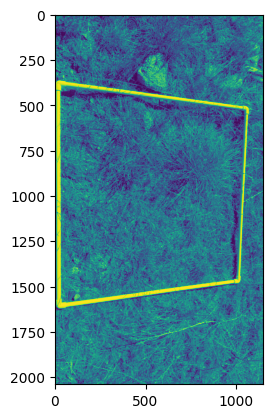

In [4]:

img = img_as_ubyte(io.imread('quadrat_photos_raw/441959955_1200760134272433_6935347568072997467_n.jpg', as_gray=True))

# Rotate image 90 degrees
rotated = ndimage.rotate(img, 90) # reshape argument will control cropping with rotation
plt.imshow(rotated) 


Scipy: filters  
Here's a list of all the filters u can use: https://docs.scipy.org/doc/scipy/reference/ndimage.html

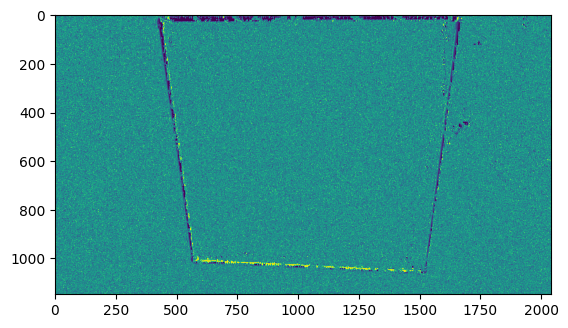

In [5]:
# DE-NOISING, SMOOTHING
# Uniform filter blurs the image.
uniform_filtered = ndimage.uniform_filter(img, size=3)
# Gaussian filter adds a gaussian blur. Doesn't preserve edges. 
gaussian_filtered = ndimage.gaussian_filter(img, sigma=3)
# De-noised but does preserve edges
median_filtered = ndimage.median_filter(img, 3)

# EDGE DETECTION
sobel_img = ndimage.sobel(img) # Looks like it picks up the quadrat well, and the rest is noise. Tinker with the axis argument to adjust. 

plt.imshow(sobel_img)

IMAGE PROCESSING WITH SCIKIT-IMAGE

In [ ]:
from skimage import io
from matplotlib import pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean

In [ ]:
img = io.imread('quadrat_photos_raw/441951468_751377703815276_4256953090677514527_n.jpg', as_gray=True)

# Scale image by 1/4, add anti-aliasing
rescaled_img = rescale(img, 1.0/4.0, anti_aliasing = True)
# Scale image down to specified pixels. Will squish image. 
resized_img = resize(img, (200, 200))

plt.imshow(rescaled_img)

Edge detection

In [6]:
from skimage.filters import roberts, sobel, scharr, prewitt

In [ ]:
edge_roberts = roberts(img) # Apply roberts edge detection mode
edge_sobel = sobel(img) # Apply sobel edge detection mode
edge_scharr = scharr(img) # Apply scharr edge detection mode
edge_prewitt = prewitt(img) # Apply prewitt edge detection mode

plt.imshow(edge_roberts)
plt.imshow(edge_sobel)
plt.imshow(edge_scharr)
plt.imshow(edge_prewitt)

# Use different methods depending on what works the best for your data.

In [ ]:
from skimage.feature import canny

In [ ]:
edge_canny = canny(img, sigma=4)
# sigma adjusts the sensitivity of the edge detection.

plt.imshow(edge_canny)

Deconvolution

In [ ]:
from skimage import restoration
import numpy as np

In [ ]:
# Create a 3x3 matrix with 9 ones. Normalize the matrix by dividing by 9.
psf = np.ones((3,3)) / 9

# Deconvolute the image. 
deconvolved, _ = restoration.unsupervised_wiener(img, psf)

# Save the image to the edited quadrat photos folder.
plt.imsave('quadrat_photos_edited/deconvolved.jpg', deconvolved)

Using entropy filter for segmentation

In [11]:
import matplotlib.pyplot as plt
from skimage import io, restoration
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import try_all_threshold

C:\Users\dusty\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3577: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


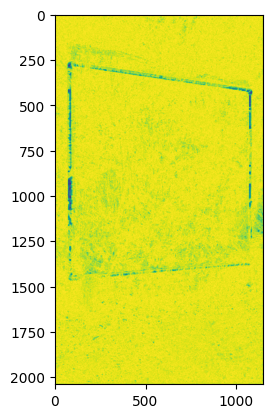

In [12]:
# Import the image as gray (it needs to be grayscale or else the entropy function no workie). 
img = io.imread('quadrat_photos_raw/442006991_1175880083845572_7503037711238909895_n.jpg', as_gray = True)

# Apply entropy filter
entropy_img = entropy(img, disk(3))
plt.imshow(entropy_img)

In [ ]:
# Show different methods of segmentation???
fig, ax = try_all_threshold(entropy_img, figsize=(10,8), verbose=False)

In [ ]:
from skimage.filters import threshold_isodata
import numpy as np

In [ ]:
# Thresh is one value that says what the threshold is for that image. You know, whatever that means.
thresh = threshold_isodata(entropy_img)

# Binary is a matrix of the image, and all the dark pixels are True and all the light pixels are False.
binary = entropy_img <= thresh

# Show the binary image in black and white. 
plt.imshow(binary, cmap='gray')

Entropy filter example

In [3]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu



In [ ]:
# Import image in grayscale
img2 = io.imread('quadrat_photos_raw/20240531_103700.jpg', as_gray=True)

# Add entropy filter
entropy_img2 = entropy(img, disk(5))

plt.imshow(entropy_img2)

# Check the different threshold options
# fig, ax = try_all_threshold(entropy_img, figsize=(10,8), verbose=False)
# Otsu picks out the pipe the best so we'll use that one. 

thresh2 = threshold_otsu(entropy_img2)

binary2 = entropy_img2 <= thresh2

plt.imshow(binary2, cmap = 'gray')




Use a loop to binarize several photos

In [2]:
import glob # for file names
import numpy as np

In [14]:
area_list = []
index_list = []
path = 'quadrat_photos_raw/*'

# Do 5 line image analysis on every image in the file to see if the dark area increases or decreases. Mainly makes sense in scratch assay analysis but not here.
for i, file in enumerate(glob.glob(path)):
    # read the image in
    img = io.imread(file, as_gray = True)

    # Apply entropy filter
    entropy_img = entropy(img, disk(10))

    # Establish threshold value
    thresh = threshold_otsu(entropy_img)

    # Make a binary image that separates pixels that are and aren't over the threshold
    binary = entropy_img <= thresh
    
    # Save the dark area in pixels (???)
    dark_area = np.sum(binary == True)

    # Append index and areas into lists so they can be plotted later. 
    index_list.append(i)
    area_list.append(dark_area)

# Plot the areas over time.
plt.plot(index_list, area_list, 'bo')

NameError: name 'threshold_otsu' is not defined

SCIKIT IMAGE NON-LOCAL MEANS DENOISING

In [ ]:
from skimage import io
from scipy import ndimage as nd
from matplotlib import pyplot as plt

In [ ]:
# This image has shadows over the top of that. Maybe denoising will help?
noisy_img = io.imread('quadrat_photos_raw/441945392_7611293982323093_6609539894515730557_n.jpg', as_gray = True)

# Apply medain filter (does what gaussian filter does but preserves edges)
median_img = nd.median_filter(noisy_img, size = 3) # size measures in kernels

plt.imsave('quadrat_photos_edited/denoised.jpg', median_img)
# It looks pretty sweet but it didn't solve the shadow problem


Try non-local means for digital photos. Info is in this video: https://www.youtube.com/watch?v=2PrzKWkqOtU&list=PLZsOBAyNTZwYHBIlu_PUO19M7aHMgwBJr&index=23  
There is also some documentation and copy-able code here: https://scikit-image.org/docs/stable/auto_examples/filters/plot_nonlocal_means.html

HISTOGRAM BASED SEGMENTATION

In [ ]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_float, img_as_ubyte, io
import numpy as np
from matplotlib import pyplot as plt
import pywt

In [ ]:
# Load in image
img = io.imread('quadrat_photos_raw/442006967_421825957362171_8934033133085778559_n.jpg', as_gray=True)

# DE-NOISING
# Convert the image to a float in order to make this work
img = img_as_float(img)

# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(img, channel_axis=-1))

# Denoise the image based on the sigma that was just found
denoised = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3)

# Convert it back to ubyte
denoised_ubyte = img_as_ubyte(denoised)

plt.imshow(denoised_ubyte, cmap='gray')



In [ ]:

# View histogram
plt.hist(denoised_ubyte.flat, bins=100, range=(0,255)) # .flat flattens array into 1D (bc histogram 1D)

HISTOGRAM SEGMENTATION USING COLOR SPACES

In [5]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io, measure
from skimage.color import label2rgb
from scipy import ndimage as nd

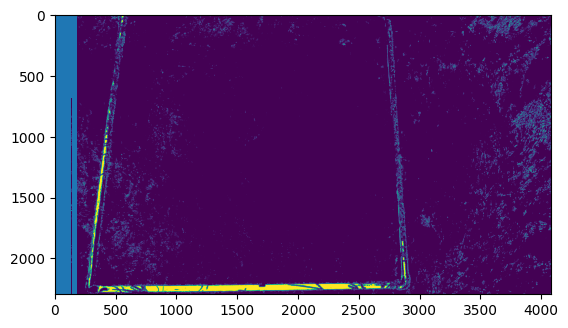

In [8]:
# Import image
img = io.imread('quadrat_photos_raw/20240531_103357.jpg')

# Convert image to hsv
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

hue, saturation, value = cv2.split(img_hsv)

plt.hist(hue.flatten(), bins=100)

mask = cv2.inRange(img_hsv, (100, 30, 0), (135, 50, 255))

plt.imshow(mask)

HSV Segmentation on an image that's likely to work with it

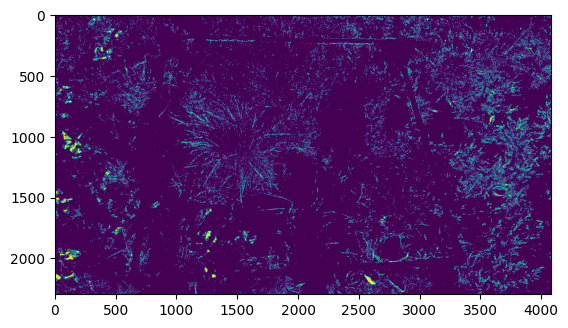

In [7]:
# Import image
img = io.imread('quadrat_photos_raw/20240531_103430.jpg')

# Convert image to hsv
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Make an HSV range that should capture some greens
mask = cv2.inRange(img_hsv, (40, 30, 0), (90, 50, 200))

plt.imshow(mask)

In [ ]:
# Close mask. This appears to increase the value contrast in order to bring out the segmented shapes. 
closed_mask = nd.binary_closing(mask, np.ones((7,7)))
plt.imshow(closed_mask)

In [1]:
# Each shape gets its own color. Like adding a gradient on top.
label_image = measure.label(closed_mask)
plt.imshow(label_image)

NameError: name 'measure' is not defined

In [ ]:
# Overlays labelled image on top of og image.
image_label_overlay = label2rgb(label_image, image=img)
plt.imshow(image_label_overlay)

In [ ]:
# Put image properties into a pandas table
import pandas as pd

props = measure.regionprops_table(label_image, img, 
                                  properties = ['label', 'area', 'equivalent_diameter', 'mean_intensity', 'solidity'])

df = pd.DataFrame(props)
print(df.head())

RANDOM WALKER SEGMENTATION  
could be useful when differences between groups are low

In [1]:
from skimage import io, img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as nd
from skimage.restoration import denoise_nl_means, estimate_sigma


In [25]:
img = img_as_float(io.imread('quadrat_photos_raw/20240531_103430.jpg', as_gray=True))

# Optional: downsample the image for faster processing
# Rescale image to 50% of the original size
# img = rescale(img, 0.5, anti_aliasing=True, multichannel=True)

# Try histogram to see if this method is necessary yet. 
# plt.hist(img.flat, bins=100, range=(0,1)) # Range is 0-1 because this is a float image

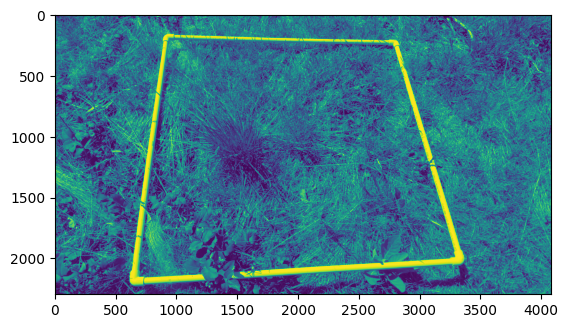

In [26]:
# Try denoising too. Use median filter
# median_img = nd.median_filter(img, size = 3)

# Alternate denoising method: non-local means
# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(img, channel_axis=-1))

# Denoise the image based on the sigma that was just found
denoised = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3)

# Convert it back to ubyte
denoised_ubyte = img_as_ubyte(denoised)

plt.imshow(denoised_ubyte)




(array([ 25220., 102376., 115548., 214090., 154690., 215291., 131541.,
        187378., 119224., 172661., 166798., 108958., 160699., 107048.,
        159108., 103509., 154052., 101123., 149883.,  98674., 145733.,
        144945.,  95979., 144950.,  96332., 145122.,  96572., 146006.,
         97188., 145660., 146652.,  97436., 146642.,  97391., 145739.,
         96487., 143259.,  95596., 139855.,  89875., 131337., 126656.,
         82448., 123524.,  81739., 121948.,  80626., 120299.,  79770.,
        118968., 118528.,  78627., 119596.,  81747., 123923.,  84548.,
        127731.,  86411., 129644.,  85269., 125100., 121295.,  78653.,
        114050.,  74332., 107478.,  68902.,  99976.,  64829.,  93460.,
         89927.,  57307.,  82144.,  51692.,  72235.,  44925.,  63343.,
         39547.,  57515.,  38670.,  55613.,  45634.,  23355.,  27422.,
         15063.,  19310.,  11568.,  15779.,   9979.,  14393.,  14324.,
          9418.,  13909.,   9215.,  14458.,  10587.,  18975.,  17086.,
      

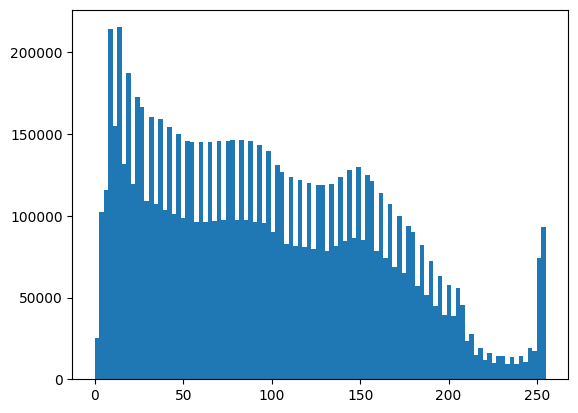

In [27]:
# Test histogram now.
plt.hist(denoised_ubyte.flat, bins=100, range=(0,255)) 

The peaks are better, but still not differentiated enough for thresholding. Now try equalizing to increase the contrast.  
Two functions: adapthist (subtle) and hist (more aggressive). Adapthist will spread out a small range of values into a larger range.

In [17]:
from skimage import exposure

(array([ 82406.,  98895.,  61843.,  67350., 146740.,  77174.,  77516.,
         74719., 140572.,  67035., 128166.,  62350., 121196.,  59396.,
        115495., 113111.,  55343., 109995., 108036.,  53509., 107211.,
        106799., 105773., 103509.,  51551., 102501., 101123.,  99978.,
         99535.,  97727.,  97050.,  96672.,  96394.,  95914.,  48456.,
         96716.,  96248.,  96928.,  96572.,  96914.,  97530.,  97453.,
         96957.,  98285.,  97095.,  97698.,  97652.,  97391.,  49166.,
         96573.,  96487.,  95370.,  95767.,  94988.,  92585.,  89875.,
        131337.,  85164.,  82958.,  82283., 123017.,  81857.,  81036.,
        120994.,  79931.,  79770., 118968.,  79059.,  78769., 118739.,
         80919.,  81953., 124926.,  84951.,  85384.,  86411.,  86530.,
         85584., 127374.,  81316.,  80504., 117027.,  75676., 110511.,
         71299., 102884.,  98682.,  94864.,  90957.,  87014., 108335.,
         97736.,  87603.,  98558.,  95602.,  96644.,  94113.,  93534.,
      

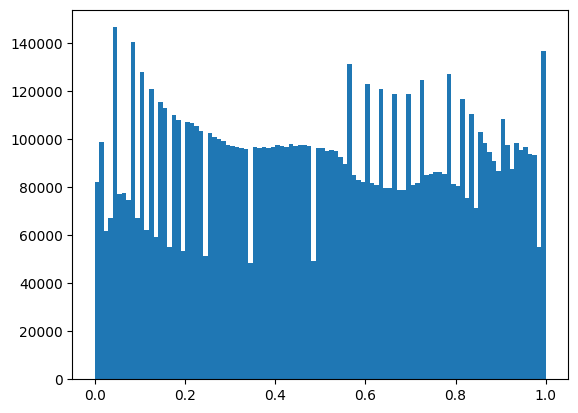

In [29]:
# eqlzd_img = exposure.equalize_adapthist(denoised_ubyte)
eqlzd_img = exposure.equalize_hist(denoised_ubyte)

# Test histogram now.
plt.hist(eqlzd_img.flat, bins=100, range=(0,1)) 

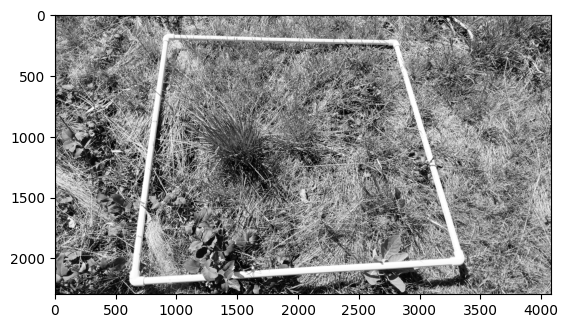

In [32]:
plt.imshow(eqlzd_img, cmap='gray')
# It's not enough to do histogram segmentation. Move on to random walker.

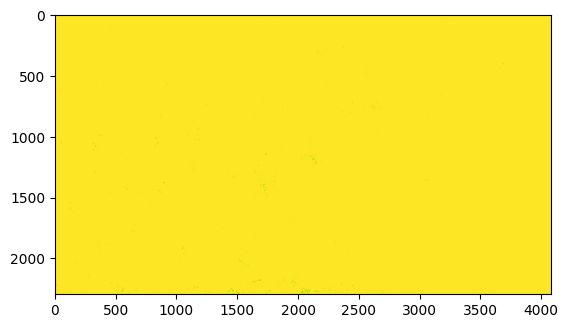

In [37]:
markers = np.zeros(denoised_ubyte.shape, dtype=np.uint)

markers[(img < 255) & (img > 200)] = 1
markers[(img < 200) & (img > 0)] = 2

plt.imshow(markers)

This method probably isn't going to work for these quadrat images. 

OPENCV: RESIZE
IMPORTANT NOTE: order is BGR, not RGB.

In [9]:
import cv2

In [46]:
img = cv2.imread('quadrat_photos_raw/20240531_103430.jpg')

# print(img.shape) # (4080, 2296, 3)

# Resize an image
resized = cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_AREA) 
# fx and fy are coefficients by which you scale the dimensions.
# Interpolation is what you fill the empty space with when you increase image size

cv2.imshow('og image', img)
cv2.imshow('resized image', resized)

cv2.waitKey(0)
cv2.destroyAllWindows()

OPEN CV: DENOISING AND EDGE DETECTION

In [8]:
import numpy as np
from matplotlib import pyplot as plt

Denoising

In [59]:
# Read in image as a color image (1 parameter)
img = cv2.imread('quadrat_photos_raw/20240531_103430.jpg', 1)

# DENOISE
# Start convolution by defining a kernel - a 25x25 matrix of all ones. 
kernel = np.ones((3,3), np.float32) / 9 # It's normalized so things don't change so extremely.
# Alternate option is (5,5) and divided by 25.

filter_2D = cv2.filter2D(img, -1, kernel)
 
# Another denoising option - blurring
img_blur = cv2.blur(img,(3,3))

# Another blur
gaussian_blurred_img = cv2.GaussianBlur(img, (3,3), 0)

# Median denoising, maintains edges
median_filtered_img = cv2.medianBlur(img, 3)

# Bilateral blur - maintains edges even better than median
bilateral_blurred_img = cv2.bilateralFilter(img, 9, 75, 75) # what's the deal with the d parameter? No clue what those numbers do but they have to be there in order for it to work.


# Display images
cv2.imshow('og image', img)
cv2.imshow('2D custom filter image', filter_2D)
cv2.imshow('Blurred image', img_blur)
cv2.imshow('Gaussian blurred image', gaussian_blurred_img)
cv2.imshow('Median filter', median_filtered_img)
cv2.imshow('Bilateral filter', bilateral_blurred_img)

# There really isn't a big difference between these blurring styles. Median is great because it maintains the images much better than the others. 
# Bilateral is indeed better than median. Cool beans.
# Nonlocal means filter is also recommended, especially when you want to keep texture.

# Let windows close
cv2.waitKey(0)
cv2.destroyAllWindows()


Edge Detection: canny edge

In [62]:
# Read in image as a color image (1 parameter)
img = cv2.imread('quadrat_photos_raw/20240531_103430.jpg', 1)

edges = cv2.Canny(img, 100, 200)

cv2.imshow('edges', edges) 
# Goodness gracious it looks like a worm infestation in there
# But yeah it looks pretty sophisticated. Good easy edge detection that would be great for splitting out the quadrat.

# Let windows close
cv2.waitKey(0)
cv2.destroyAllWindows()

### HSV Histogram experiment

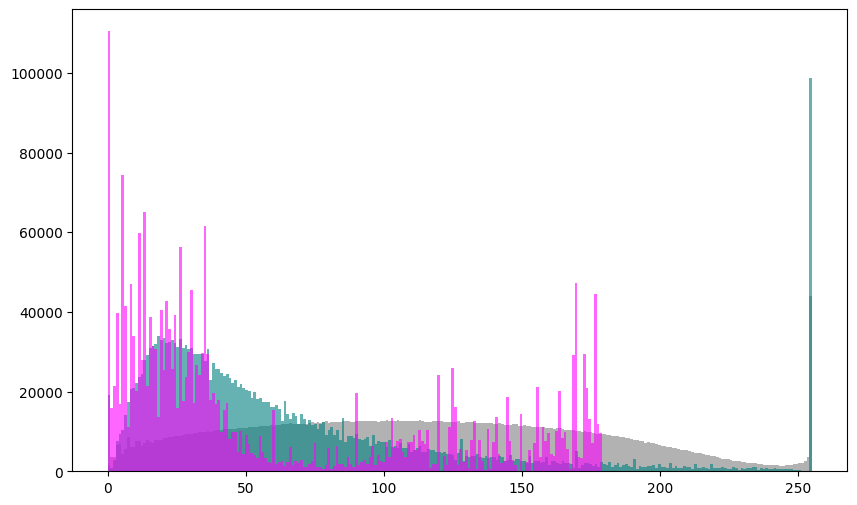

In [21]:
# Load in image in color
img = cv2.imread('quadrat_photos_raw/442006967_421825957362171_8934033133085778559_n.jpg')

# Convert the image into HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Split the HSV image into its channels
hue, saturation, value = cv2.split(img_hsv)

# Plot a histogram for each channel
fig, ax = plt.subplots(figsize=(10, 6))

# Make a histogram for each channel
ax.hist(value.flatten(), bins=256, color='gray', alpha=.6, label='Value')
ax.hist(saturation.flatten(), bins=256, color='teal', alpha=.6, label='Saturation')
ax.hist(hue.flatten(), bins=180, color='magenta', alpha=.6, label='Hue')

# Show all histograms created in the same plot
plt.show()


You seem to have conquered the art of making histograms, so it would be useful to move on to making a series of three scatterplots:

For RGB:
Red vs green
Red vs blue
Green vs blue

For HSV:
Hue vs saturation
Hue vs value
Saturation vs value
 

Better yet (potentially), make 3D scatter plots.

XYZ axes = RGB
XYZ axes = HSV

Exploratory histograms to see what the RGB channel distributions are like

In [2]:
from skimage import io
from matplotlib import pyplot as plt
import cv2

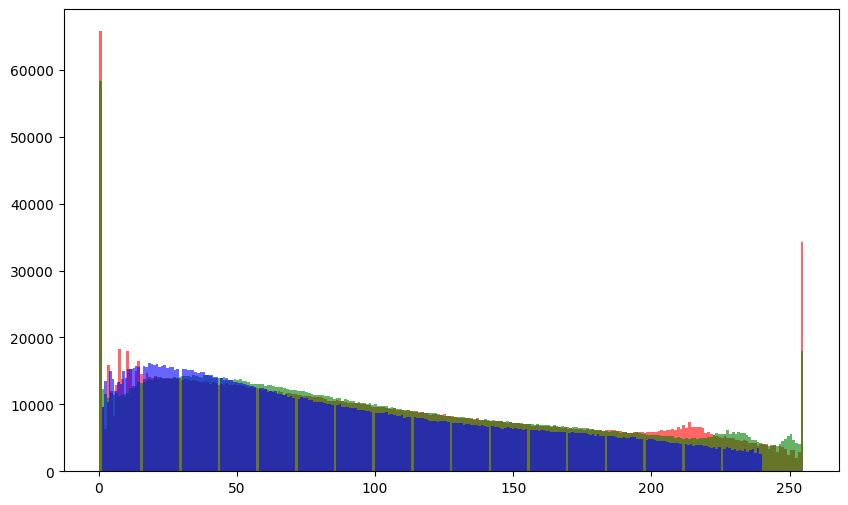

In [4]:
# Load in the image - a quadrat photo without the color checker. 
img = io.imread('quadrat_photos_raw/445994924_997944038572600_5402110927392362040_n.jpg')

# Split the image into RGB channels
red, green, blue = cv2.split(img)


# Plot a histogram for each channel
fig, ax = plt.subplots(figsize=(10, 6))

# Make a histogram for each channel
ax.hist(red.flatten(), bins=256, color='r', alpha=.6, label='Red')
ax.hist(green.flatten(), bins=256, color='g', alpha=.6, label='Green')
ax.hist(blue.flatten(), bins=256, color='b', alpha=.6, label='Blue', range=(1,240))

# Show all histograms created in the same plot
plt.show()

Nothing really to see here. It's consistent with a few other images that the levels are all fairly evenly distributed.  
Scatterplots now:

In [5]:
# Flatten the channels
red = red.flatten()
green = green.flatten()
blue = blue.flatten()

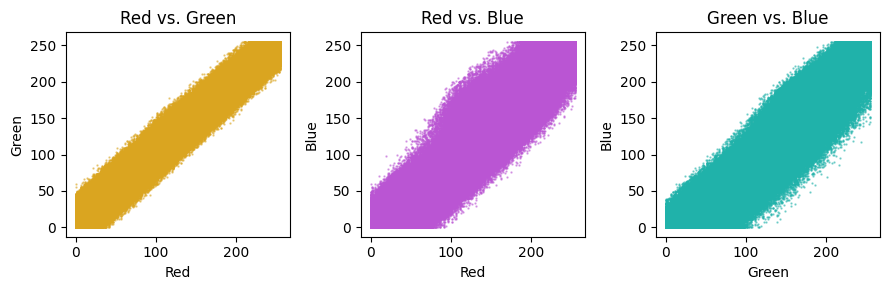

In [28]:
# Create a figure
plt.figure(figsize=(9, 3))

# Red vs. Green scatterplot
plt.subplot(1, 3, 1)

plt.scatter(x=red, y=green, color='goldenrod', alpha=.5, s=.5)

plt.xlabel('Red')
plt.ylabel('Green')
plt.title('Red vs. Green')

# Red vs. Blue scatterplot
plt.subplot(1, 3, 2)

plt.scatter(x=red, y=blue, color='mediumorchid', alpha=.5, s=.5)

plt.xlabel('Red')
plt.ylabel('Blue')
plt.title('Red vs. Blue')

# Green vs. Blue scatterplot
plt.subplot(1, 3, 3)

plt.scatter(x=green, y=blue, color='lightseagreen', alpha=.5, s=.5)

plt.xlabel('Green')
plt.ylabel('Blue')
plt.title('Green vs. Blue')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

Now do the same thing with HSV channels.

In [35]:
# Load in the image 
img = io.imread('quadrat_photos_raw/445994924_997944038572600_5402110927392362040_n.jpg')

# Convert the image into HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Split the color channels
hue, saturation, value = cv2.split(img_hsv)


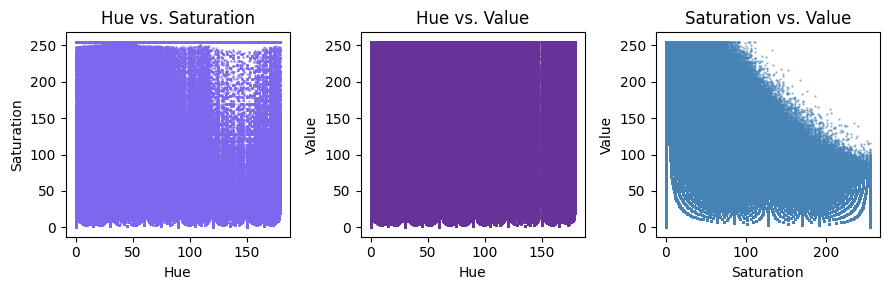

In [36]:
# Create a figure
plt.figure(figsize=(9, 3))

# Hue vs. Saturation scatterplot
plt.subplot(1, 3, 1)

plt.scatter(x=hue, y=saturation, color='mediumslateblue', alpha=.5, s=.5)

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Hue vs. Saturation')

# Hue vs. Value scatterplot
plt.subplot(1, 3, 2)

plt.scatter(x=hue, y=value, color='rebeccapurple', alpha=.5, s=.5)

plt.xlabel('Hue')
plt.ylabel('Value')
plt.title('Hue vs. Value')

# Saturation vs. Value scatterplot
plt.subplot(1, 3, 3)

plt.scatter(x=saturation, y=value, color='steelblue', alpha=.5, s=.5)

plt.xlabel('Saturation')
plt.ylabel('Value')
plt.title('Saturation vs. Value')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

### K-means clustering
- Un-supervised machine learning
- k is the amount of clusters you want to break datapoints up into
- measures distance points are from centroids. Points closer to one centroid get categorized into the group for that centroid. (iterates that process)

Note that this is linear regression kind of stuff. I can go back and watch the other videos in order to understand this better. 

In [40]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [33]:
# Load in sample dataframe
df = pd.read_csv('../../dump_python/decibels.csv')

# Convert cols to floats because for some reason they're strings
df['hours_from_midnight'] = pd.to_numeric(df['hours_from_midnight'])
df['decibels'] = pd.to_numeric(df['decibels'])

# Make a regression plot of hours_from_midnight and decibels.
sns.regplot(x=df['hours_from_midnight'], y=df['decibels'], fit_reg=False) # fit_reg controls whether there's a regression line or not.

float64


In [35]:
# Drop the non-numeric columns because the machine learning here requires the dataframe to be nothing but the two columns of interest.
df = df.drop(columns=['time', 'location'])

# This block is isolated because it should only happen once.

KeyError: "['time', 'location'] not found in axis"

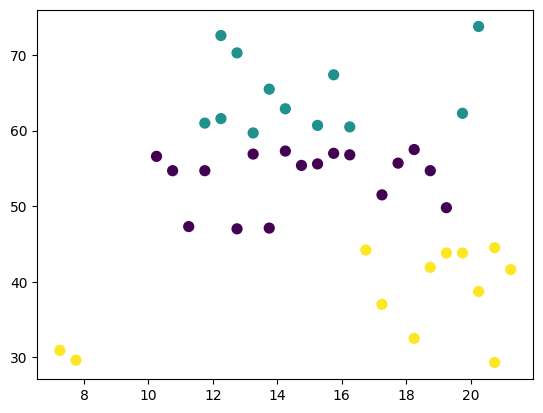

In [39]:

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0) # max-iter is the maximum number of iterations for clustering

# Fit the model 
model = kmeans.fit(df)

# Predict some values
predicted_values = kmeans.predict(df)

plt.scatter(df['hours_from_midnight'], df['decibels'], c=predicted_values, s=50, cmap='viridis')
# Show the centroids. Something went wrong and they don't make any sense...
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, alpha=.5)


Now try Kmeans clustering on a greenhouse image using cv2

In [53]:
# Import image
img = cv2.imread('test_photos/test_image_22.jpg')

# No need to convert from BGR to RGB

# Image is currently (5184, 3456, 3)
print(img.shape)

# Reshape the image - change its dimensions.
# resize image
smol_img = img.reshape((-1, 3))

# Image has been reshaped to (17915904, 3) because that makes it easier for opencv kmeans clustering
print(smol_img.shape)

# convert image into a float32 in order to make this work
float_img = np.float32(smol_img)



(5184, 3456, 3)
(17915904, 3)


In [61]:
# define number of clusters (10), and epsilon value (1.0)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Number of clusters
k=4
# Attempts: flag to specify num of times algorithm is executed using different initial labels
attempts = 10

# compactness: how compact are the clusters. label: the label. Center: center of each cluster
compactness, label, center = cv2.kmeans(float_img, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

# Convert center into an unsigned int so we can plot it.
center = np.uint8(center)

# flatten the labels
res = center[label.flatten()]

# Reshape flattened array into an image of the same shape as the og image
res2 = res.reshape((float_img.shape))



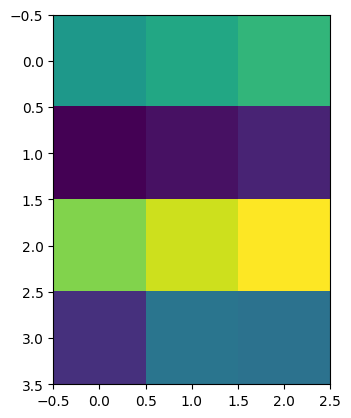

In [69]:
# save result to file WHY NO WORKIE???
cv2.imwrite('results/greenhouse_segmtd_by_kmeans_clustering.jpg', res2)

# plt.imshow(res2)
# The image is empty???

plt.imshow(center)

AFFINE TRANSFORMATION

In [61]:
import cv2
import numpy as np
from skimage.feature import canny
from scipy import ndimage
from matplotlib import pyplot as plt

Find the points in the corners

In [19]:
img = cv2.imread('test_photos/image_1.jpg')

# Reduce the image size by half because the windows are too huge.
img = cv2.resize(img, (0, 0), fx=.5, fy=.5)

# Add a red dot onto the corners of the quadrat
cv2.circle(img, (180, 50), 5, (0, 0, 255), -1) # top left
cv2.circle(img, (660, 37), 5, (0, 0, 255), -1) # top right
cv2.circle(img, (730, 540), 5, (0, 0, 255), -1) # bottom right
cv2.circle(img, (80, 550), 5, (0, 0, 255), -1) # bottom left

cv2.imshow('pic', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# Get image shape
rows, cols, ch = img.shape

In [40]:
# Give the points numpy variables because I'm not a psycho
top_left = np.array([180, 50])
top_right = np.array([660, 37])
bottom_left = np.array([80, 550])
bottom_right = np.array([730, 540])

# Get new square points
new_tr = top_left + np.array([420, 0])
new_bl = top_left + np.array([0, 420])
new_br = top_left + np.array([420, 420])


# Put those points into an array 
pre_array = np.float32([top_left, top_right, bottom_left])
post_array = np.float32([top_left, new_tr, new_bl])

matrix = cv2.getAffineTransform(pre_array, post_array)
# Apply transformation
result = cv2.warpAffine(img, matrix, (cols, rows))

cv2.imshow('affine transform', result)

cv2.waitKey(0)
cv2.destroyAllWindows()


ChatGPT has shown me a better way ToT

In [55]:
# Make an array containing the points that correspond to the quadrat inside corners
quadrat_corners = np.array([
    [180, 50], # tl
    [660, 37], # tr
    [80, 550], # bl
    [730, 540] # br
], dtype=np.float32)

# Define a side length for the square based on the top quadrat length
distance = quadrat_corners[0] - quadrat_corners[1] 
side_length = abs(int(distance[0])) # absolute value of difference between first & second vector

corner_destinations = np.array([
    [0, 0],
    [side_length, 0],
    [0, side_length],
    [side_length, side_length]
], dtype=np.float32)

# Get affine transformation matrix 
matrix = cv2.getPerspectiveTransform(quadrat_corners, corner_destinations)

# Apply affine transformation
img_transformed = cv2.warpPerspective(img, matrix, (side_length, side_length))

cv2.imshow('og image', img)
cv2.imshow('affine transform', img_transformed)

cv2.waitKey(0)
cv2.destroyAllWindows()

How to detect quadrat corners automatically

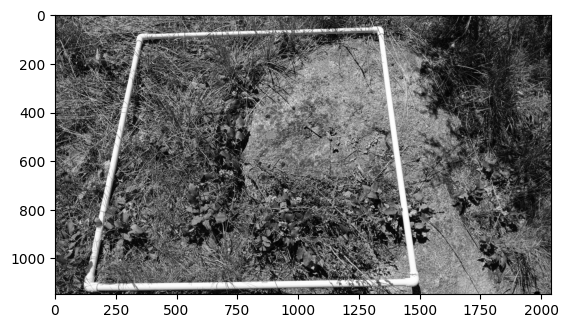

In [29]:
# Load in the image with the rock in it, grayscale
img = cv2.imread('test_photos/image_1.jpg', 0)

# Denoise with median filter
img_denoised = ndimage.median_filter(img, 3)

# Apply canny edge detection
edges = cv2.Canny(img_denoised, threshold1=50, threshold2=150)

plt.imshow(edges)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# Function to order points in clockwise order
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect


# Loop over the contours to find the quadrat
for contour in contours:
    # Approximate the contour to a polygon
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # If the approximated contour has 4 points, we can assume it's our quadrat
    if len(approx) == 4:
        quadrat_corners = approx.reshape(4, 2)
        quadrat_corners = order_points(quadrat_corners)
        break

# Draw the detected corners on the image
for point in quadrat_corners:
    # Convert point coordinates into integers
    point_1 = int(point[0])
    point_2 = int(point[1])
    cv2.circle(img, (point_1, point_2), 10, (0, 255, 0), -1)
    # print(point_1, point_2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


# cv2.imshow('img', edges)

# cv2.waitKey(0)
# cv2.destroyAllWindows()



Alternatively, pick up on quadrat using thresholding and segmentation basics

In [2]:
from skimage import img_as_float, img_as_ubyte

In [1]:
img = cv2.imread('test_photos/image_23.jpg', 0)

NameError: name 'cv2' is not defined

In [40]:
# Denoise with filter (Experiment with median and gaussian, in addition to alternate sigma values)
img_denoised = ndimage.median_filter(img, 4)

# Convert image into float
img_float = img_as_float(img_denoised)

# If image is <= to the threshold number, it's True. False otherwise.
binary_otsu = img_float >= .93 # .90 is meant to pick up the white of the quadrat.

# Convert back to ubyte
img_ubyte = img_as_ubyte(binary_otsu)

# Use median filter to remove the noise in the rest of the image so only the quadrat will get used
blurred_ubyte = ndimage.median_filter(img_ubyte, 4)

# plt.imshow(img_binary_combo)

# cv2.imshow('img', img_ubyte)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

ValueError: Cannot convert from object to float64.

TypeError: Image data of dtype object cannot be converted to float

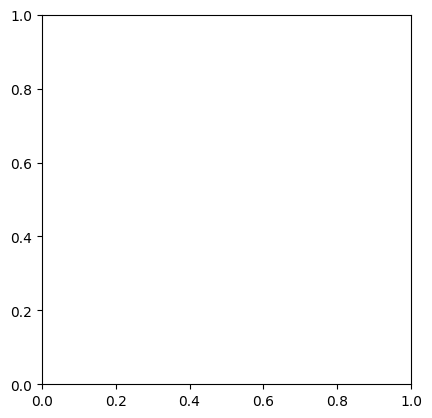

In [51]:
from skimage.filters.rank import entropy
from skimage.morphology import disk

# TINKERING to see if I can capture the quadrat more accurately
# entropy_img = entropy(img, disk(3))
# img_float_entropy = img_as_float(entropy_img)

# Threshold by hue to capture shadows over quadrat
color_img = cv2.imread('test_photos/image_23.jpg')
plt.imshow(color_img)


# Convert the images to HSV
# img_hsv = cv2.cvtColor(color_img, cv2.COLOR_RGB2HSV)
    
# mask = cv2.inRange(img_hsv, (200, 0, 0), (230, 255, 255))


# img_binary_combo = img_as_ubyte((img_float.any() >= .90) and (img_float_entropy < 4.25))
# img_just_luminance = img_as_ubyte(img_float >= .90)
# img_just_entropy = img_as_ubyte(img_float_entropy < 4.25)

# cv2.imshow('Luminance restriction', img_just_luminance)
# cv2.imshow('Entropy restriction', img_just_entropy)
# cv2.imshow('Binary combo', img_binary_combo)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(color_img)

# plt.hist(img_float_entropy.flat, bins=100)

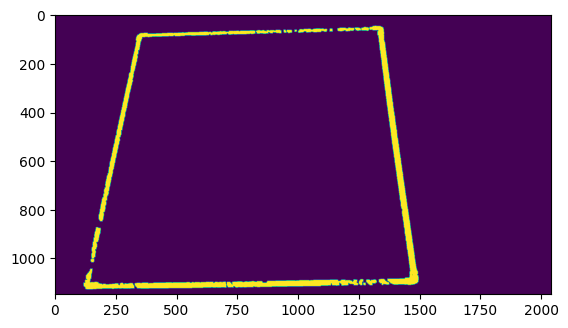

In [68]:
# Random sreeni cleanup code that might do stuff to pull together shapes?
kernel = np.ones((3,3), np.uint8)
# Ok don't do erosion - it made it worse. 
# eroded = cv2.erode(img_ubyte, kernel, iterations = 1)

# Dilation pulls together the shapes quite well.
dilated = cv2.dilate(blurred_ubyte, kernel, iterations = 3)

plt.imshow(dilated)


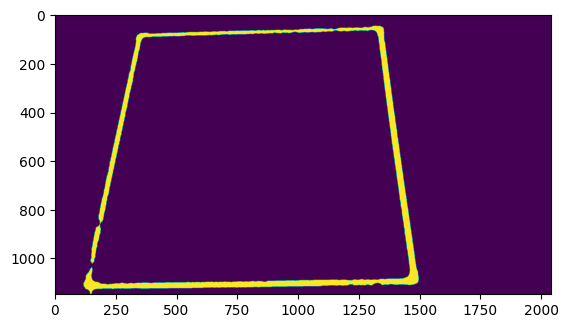

In [79]:
import skimage

# Try using binary_closing to close the gaps
closed_mask = skimage.morphology.isotropic_closing(dilated, 20)

plt.imshow(closed_mask)

Now try detecting edges on simplified image

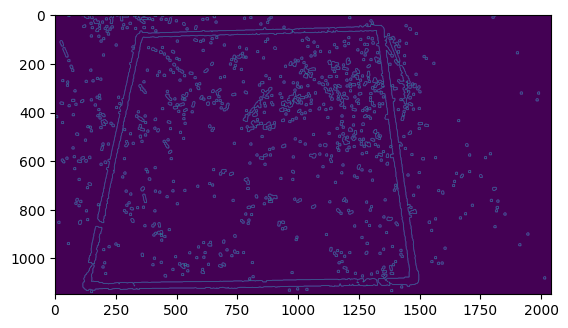

In [42]:
# Apply canny edge detection
edges = cv2.Canny(dilated, threshold1=50, threshold2=150)

plt.imshow(edges)

THRESHOLDING AND MORPHOLOGICAL OPERATIONS

In [4]:
# Load in grascale image
img = cv2.imread('test_photos/image_1.jpg', 1)

vegetated_img = apply_vegetative_index(img, index_type='rgbvi')

img_thresh = apply_otsu(vegetated_img)

cv2.imshow('img', img_thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()

### GRAIN SIZE ANALYSIS (sounds pretty relevant to rocks stuff)

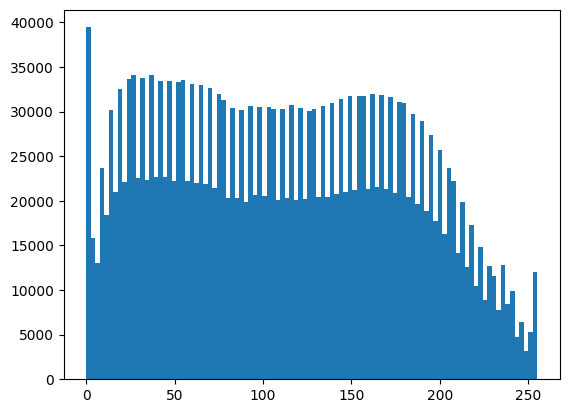

In [3]:
# Load in image that contains rocks in grayscale   
img = cv2.imread('test_photos/image_2.jpg', 0)

pixels_to_in = .5 # 1 pixel = .15 inches (this metric is bs, no clue how to tell)

# Denoise here later if you think it would help

# Separate grains from boundaries
plt.hist(img.flatten(), bins=100)

ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2.imshow('img', thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()

Do some image cleaning - erode makes areas shrink by a pixel, dilate increases by 1 pixel

In [4]:
# Define a kernel
kernel = np.ones((3,3), np.uint8)

# Try eroding the image
eroded = cv2.erode(thresh, kernel, iterations = 1)

# Try dilating it
dilated = cv2.dilate(thresh, kernel, iterations = 1)

cv2.imshow('eroded img', eroded)
cv2.imshow('dilated img', dilated)
cv2.imshow('thresh img', thresh)

# Using a smaller kernel made the eroded image break things up into sections well. Will be using that one

cv2.waitKey(0)
cv2.destroyAllWindows()


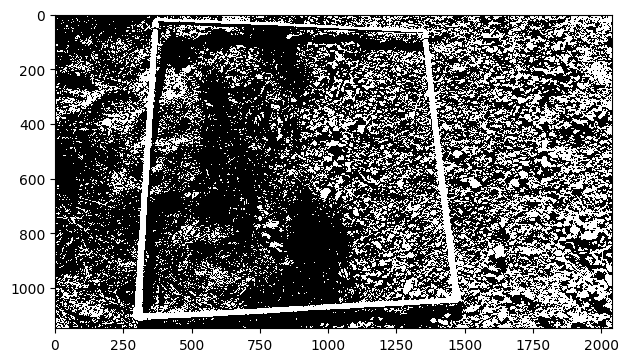

In [5]:
# Define a mask: if it's equal to 255, count it as True
mask = eroded == 255

# opening an image is opening followed by erosion. Closing is the opposite.
mask = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
# OTHER OPTIONS
# Black hat: closed image - input image
# Top hat: input image - open image


io.imshow(mask)

Label the grains

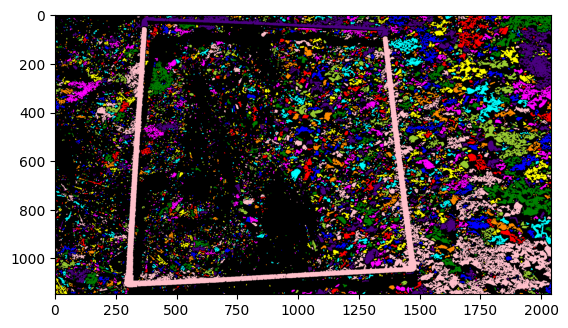

In [6]:
# Define structure - connection between shapes
s = [[1,1,1], [1,1,1], [1,1,1]] # 8 connectivity - diagonal pixels are included as part of the structure.
# structure specifies how to consider a pixel as part of an object

# Label the mask (give it the pretty gradient thing)
label_mask, num_labels = ndimage.label(mask, structure=s)

img_color = color.label2rgb(label_mask, bg_label = 0) # Assign random colors

plt.imshow(img_color)

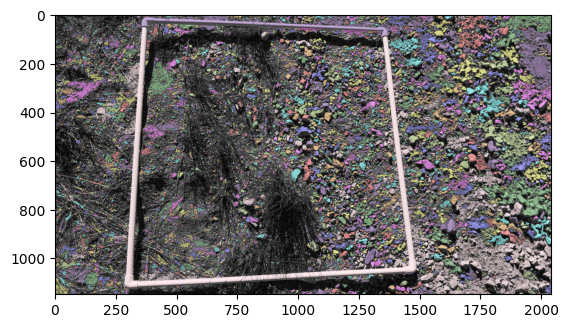

In [7]:
# Try overlaying the mask on top of the original image

# Overlays labelled image on top of og image.
image_label_overlay = label2rgb(label_mask, image=img)

plt.imshow(image_label_overlay)

It is grouping a few too many grains together. Could tinker with kernel size?
Note: Yes, using a (3,3) kernel size had a result that broke up more shapes instead of grouping them together.
For the record, when I tried showing the original "thresh" image, everything was just one color so at least we don't have that. 

Measure properties


In [11]:
# Get information about clusters
clusters = measure.regionprops(label_mask, intensity_image=img)

# Display the perimeter of the first cluster
for prop in clusters:
    print(f'Label: {prop.label} Area: {prop.area}')
# Here's all the region areas. This can be moved into a csv and stuff for analysis.

# Put output into a csv file
cols = ['Area',
             'equivalent_diameter',
             'orientation',
             'MajorAxisLength',
             'MinorAxisLength',
             'Perimeter',
             'MinIntensity',
             'MeanIntensity',
             'MaxIntensity',
             ]

# Write it out to a csv file
output_file = open('image_measurements.csv', 'w') # write mode
output_file.write(',' + ','.join(cols) + '\n') # Add header to csv

for cluster_cols in clusters:
    output_file.write(str)

Label: 1 Area: 12.0
Label: 2 Area: 8.0
Label: 3 Area: 29.0
Label: 4 Area: 26.0
Label: 5 Area: 6.0
Label: 6 Area: 6.0
Label: 7 Area: 92.0
Label: 8 Area: 167.0
Label: 9 Area: 14.0
Label: 10 Area: 6.0
Label: 11 Area: 91.0
Label: 12 Area: 41.0
Label: 13 Area: 39.0
Label: 14 Area: 18.0
Label: 15 Area: 17.0
Label: 16 Area: 18848.0
Label: 17 Area: 49.0
Label: 18 Area: 6.0
Label: 19 Area: 8.0
Label: 20 Area: 148.0
Label: 21 Area: 6.0
Label: 22 Area: 34.0
Label: 23 Area: 10.0
Label: 24 Area: 27.0
Label: 25 Area: 49.0
Label: 26 Area: 8.0
Label: 27 Area: 6.0
Label: 28 Area: 158.0
Label: 29 Area: 40.0
Label: 30 Area: 32.0
Label: 31 Area: 30.0
Label: 32 Area: 113.0
Label: 33 Area: 13.0
Label: 34 Area: 92.0
Label: 35 Area: 21.0
Label: 36 Area: 188.0
Label: 37 Area: 169.0
Label: 38 Area: 31.0
Label: 39 Area: 24.0
Label: 40 Area: 37.0
Label: 41 Area: 6.0
Label: 42 Area: 20.0
Label: 43 Area: 10.0
Label: 44 Area: 12.0
Label: 45 Area: 6.0
Label: 46 Area: 9.0
Label: 47 Area: 16.0
Label: 48 Area: 6.0
Label

TypeError: write() argument must be str, not type

## Key points, detectors, and descriptors in openCV

#### Harris Corner detection :(
recognizes everything as a corner except for the quadrat.

In [42]:
img = cv2.imread('test_photos/image_22.jpg')

# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert image to a float 
img_float = np.float32(img_gray)

#
harris = cv2.cornerHarris(img_float, 2, 3, .04)

# Return only the points within a threshold: greater than .01
img[harris > .01 * harris.max()] = [255, 0, 0]

cv2.imshow('img', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\deriv.cpp:104: error: (-211:One of the arguments' values is out of range) The kernel size must be odd and not larger than 31 in function 'cv::getSobelKernels'


#### Shi-Tomasi corner detector
completely misses all quadrat corners, even on simplified images

In [43]:
img = cv2.imread('results/isolating_quadrat/image_1_mask.jpg', 0)

# Track corners. Numeric parameters: points, quality level, euclidean distance between points
corners = cv2.goodFeaturesToTrack(img_gray, 25, .01, 10)
# Corners are xy coordinates. Convert them into integers.
corners = np.int0(corners)

for i in corners:
    # Save the coordinates of each corner detected. 
    x, y = i.ravel()
    print(x, y)
    # Draw dots for the points
    cv2.circle(img, (x, y), 3, 255, -1)


cv2.imshow('img', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\dusty\AppData\Local\Temp\ipykernel_12104\2036724932.py:6: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


329 949
849 486
409 966
335 930
28 394
394 743
725 178
797 1278
1061 608
137 1005
486 542
928 939
188 1417
144 1378
289 371
720 19
686 1094
278 1325
683 1044
475 671
366 794
368 668
108 1423
843 1654
331 1511


### FAST corner detection
Ok this one picked up on corners within the quadrat. Should be tried on simplified images. 

In [44]:
img = cv2.imread('results/isolating_quadrat/image_1_mask.jpg', 0)

# Initiate FAST object w/ default values
detector = cv2.FastFeatureDetector_create(50) # Detects 50 points

kp = detector.detect(img, None)

# Draw the image with the points on top of it
img_modified = cv2.drawKeypoints(img, kp, None, flags=0)

cv2.imshow('img', img_modified)

cv2.waitKey(0)
cv2.destroyAllWindows()

Use it with a descriptor, such as BRIEF binary robust independent elementary features

### ORB (FAST detector and BRIEF descriptor combo)
Pretty good at picking up on corners. 

In [46]:
img = cv2.imread('results/isolating_quadrat/image_1_mask.jpg', 0)

# Initiate orb lol
orb = cv2.ORB_create(50)

key_points, descriptors = orb.detectAndCompute(img, None)

# Flags can be found in documentation
# This one shows the strength of corner by circle size. 
flag = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS

# Draw keypoints
img_modified = cv2.drawKeypoints(img, key_points, None, flags=flag)

cv2.imshow('img', img_modified)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Image registration using homography

1. import 2 images in grayscale
2. initiate ORB detector
3. Find key points and descriptors
4. Match key points (by brute force matcher method)
5. Reject bad keypoints
6. register images (using homology - matches keypoints together with multiple planes)

In [13]:
img = cv2.imread('test_photos/image_22.jpg', 0) # Image to be registered

# Convert images into floats
img_float = img_as_float(img)

# If image is <= to the threshold number, it's True. False otherwise.
img_binary =  (img_float <= .9) # .90 is meant to pick up the white of the quadrat.

# Convert back to ubyte
img_ubyte = img_as_ubyte(img_binary)

# Initiate orb lol
orb = cv2.ORB_create(50)

key_points, descriptors = orb.detectAndCompute(img_ubyte, None)

# Flags can be found in documentation
# This one shows the strength of corner by circle size. 
# flag = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS

# Draw keypoints
img_modified = cv2.drawKeypoints(img_ubyte, key_points, None, flags=0)

# plt.imshow(img_modified)

cv2.imshow('img', img_modified)

cv2.waitKey(0)
cv2.destroyAllWindows()